# 가설검정

In [1]:
# 패키지 임포트
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import pandas as pd # pandads package
import numpy as np   # numpy package
import math
from scipy import stats  # Scipy Package

# 시각화 패키지
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 지정
import os
if os.name == 'nt' : # Windows OS
    font_family = "Malgun Gothic"
else: # MAC OS
    font_family = "AppleGothic"

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc={"axes.unicode_minus" : False})

In [2]:
# 기각값
z_95 = stats.norm.ppf(0.95)
print(z_95)

1.6448536269514722


In [3]:
# 변이 분석
n = 100
m_u = 70
m_sigma = 8.9
hysis_u = 71.798

# 검정 통계량 계산
z = (hysis_u - m_u) / (m_sigma / np.sqrt(n))
print(z)

## print(2 * stats.norm().sf(np.abs.(z))) # 유의확률

2.0202247191011256


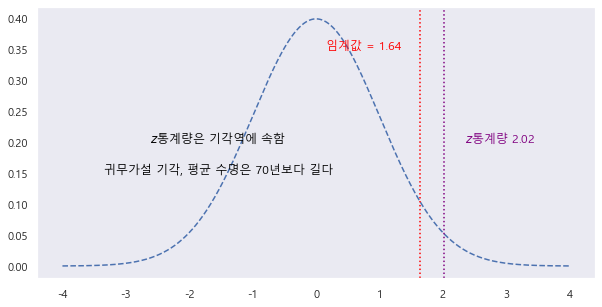

In [4]:
# 시각화

xx = np.linspace(-4, 4, 1000)
black = {"facecolor": "black"}
plt.figure(figsize=(10,5))

pdf_norm = stats.norm.pdf(xx)

plt.plot(xx, pdf_norm, 'b--')

# 95%의 임계값 표시
plt.axvline(x=z_95, color='red', linestyle=':')
plt.text(0.75, .35, '임계값 = ' + str(round(z_95, 2)),
         horizontalalignment='center',color='red')

# 위에서 구한 카이분포 통계값 = z통계량
plt.axvline(x=z , color='purple', linestyle=':')
plt.text(2.9, .2, '$z$통계량 '+ str(round(z, 2)),
         horizontalalignment='center', color='purple')
plt.text(-1.5, .2,'$z$통계량은 기각역에 속함  ',
         horizontalalignment='center', color='black')
plt.text(-1.5, .15, '귀무가설 기각, 평균 수명은 70년보다 길다 ',
         horizontalalignment='center', color='black')
plt.grid()
plt.show()

In [5]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값 , df: 자유도
t_95 = -1 * stats.t.ppf(0.95, df=n-1) # 좌측검정 * -1

print(t_95)

-1.7958848187036691


In [6]:
# 통계량 t 값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print(t_value)

-1.1644039042479846


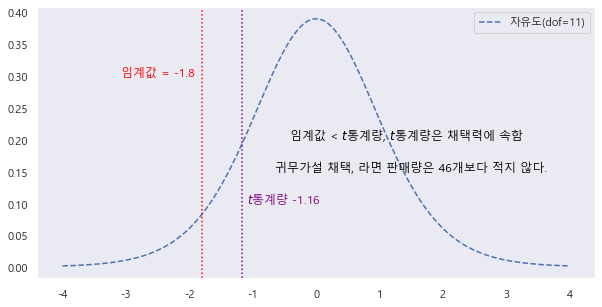

In [7]:
# 시각화
t_data = np.linspace(-4, 4, 100)
t_dist = stats.t(df=n-1)

black = {"facecolor": "black"}
plt.figure(figsize=(10, 5))

t_dist = stats.t(df=n-1)
plt.plot(t_data, t_dist.pdf(t_data), 'b--', label=("자유도(dof=%d)" % 11))

# 95%의 임계값 표시
plt.axvline(x=t_95, color='red', linestyle=':')
plt.text(-2.5, .3, '임계값 = ' + str(round(t_95,2)),
         horizontalalignment='center', color='red')

#위에서 구한 카이분포 통계값 = z 통계량
plt.axvline(x=t_value , color='purple', linestyle=':')
plt.text(-0.5, .1, '$t$통계량 '+str(round(t_value,2)),
         horizontalalignment='center', color='purple')
plt.text(1.5, .2,'임계값 < $t$통계량, $t$통계량은 채택력에 속함   ',
         horizontalalignment='center', color='black')
plt.text(1.5, .15, '귀무가설 채택, 라면 판매량은 46개보다 적지 않다.',
         horizontalalignment='center', color='black')
plt.grid()
plt.legend()
plt.show()         

In [8]:
# 변이 분석
n = 12
s_mu = 42
s_sigma = 11.9
hysis_mu = 46

# 95% 좌측검정 기각값(유의수준:5%), df:자유도
t_95 = round( -1 * stats.t.ppf(0.95, df=n-1),3 ) # 좌측검정 * -1

print("기각값 :", t_95)

# 통계량 t값 계산
t_value = (s_mu - hysis_mu) / (s_sigma / np.sqrt(n))
print('t통계량 :', round(t_value,3))

기각값 : -1.796
t통계량 : -1.164


In [9]:
# p_value(유의확률) 계산
round(stats.t(df=11).cdf(t_value),3)

0.134

Text(-3, 0.25, '검정 통계량 t=-1.164(유의확률 0.13)')

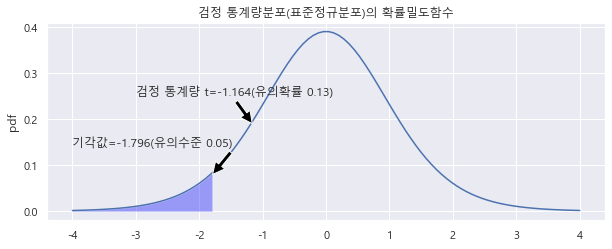

In [10]:
## 시각화

norm_rv = stats.t(df=11)

xx = np.linspace(-4, 4, 100)
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(xx, norm_rv.pdf(xx))
plt.ylabel("pdf")
plt.title("검정 통계량분포(표준정규분포)의 확률밀도함수")
black = {"facecolor": "black"}

# 기각값 texr
plt.annotate('기각값=-1.796(유의수준 0.05)', xy=(-1.79, 0.08), xytext=(-4, 0.14),
arrowprops=black)

# 기각값 면적
xx2 = np.linspace(-4, -1.796, 100)
plt.fill_between(xx2, norm_rv.pdf(xx2), facecolor='blue',alpha=0.35)

# P-value(유의확률) test
plt.annotate('검정 통계량 t=-1.164(유의확률 0.13)', xy=(-1.164, 0.19), xytext=(-3, 0.25),
             arrowprops=black)

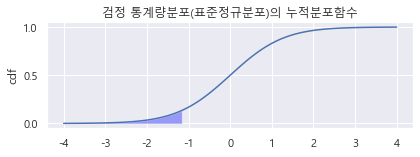

In [11]:
# P-value(유의확률) 면적
xx3 = np.linspace(-4, -1.164, 100)
plt.fill_between(xx3, norm_rv.pdf(xx3), facecolor='red', alpha=0.35)

plt.text(1, .15, '$(a = 0.05) < (P-Value = 0.134)$',
          horizontalalignment='center',color='red')
 
plt.text(1, 10, '$P$값이 유의수준보다 크므로 $H_0$ 기각되지 않는다',
          horizontalalignment='center',color='red')
 
plt.text(1, .05, '결론 : 라면 판매량은 46개보다 적지 않다.',
          horizontalalignment='center',color='red')
 
#누적분포도
plt.subplot(212)
plt.plot(xx, norm_rv.cdf(xx))

plt.fill_between(xx3, norm_rv.cdf(xx3), facecolor='blue', alpha=0.35)
plt.ylabel("cdf")
plt.title("검정 통계량분포(표준정규분포)의 누적분포함수")

plt.tight_layout()
plt.show()